# Task 1: **Credit Scoring Model**

Develop a credit scoring model to predict the
creditworthiness of individuals based on historical
financial data. Utilize classification algorithms and
assess the model's accuracy.

In [4]:
import pandas as pd

data = pd.read_csv('C:\\Users\\EliteBook\\Documents\\Research\\Machine Learning\\CodeAlpha\\Project 2\\bank.csv')
display(data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [7]:
data.rename(columns={'y': 'loan_approval'}, inplace=True) # target variable

In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            4521 non-null   int64 
 1   job            4521 non-null   object
 2   marital        4521 non-null   object
 3   education      4521 non-null   object
 4   default        4521 non-null   object
 5   balance        4521 non-null   int64 
 6   housing        4521 non-null   object
 7   loan           4521 non-null   object
 8   contact        4521 non-null   object
 9   day            4521 non-null   int64 
 10  month          4521 non-null   object
 11  duration       4521 non-null   int64 
 12  campaign       4521 non-null   int64 
 13  pdays          4521 non-null   int64 
 14  previous       4521 non-null   int64 
 15  poutcome       4521 non-null   object
 16  loan_approval  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# Distribution of the catagorical variables

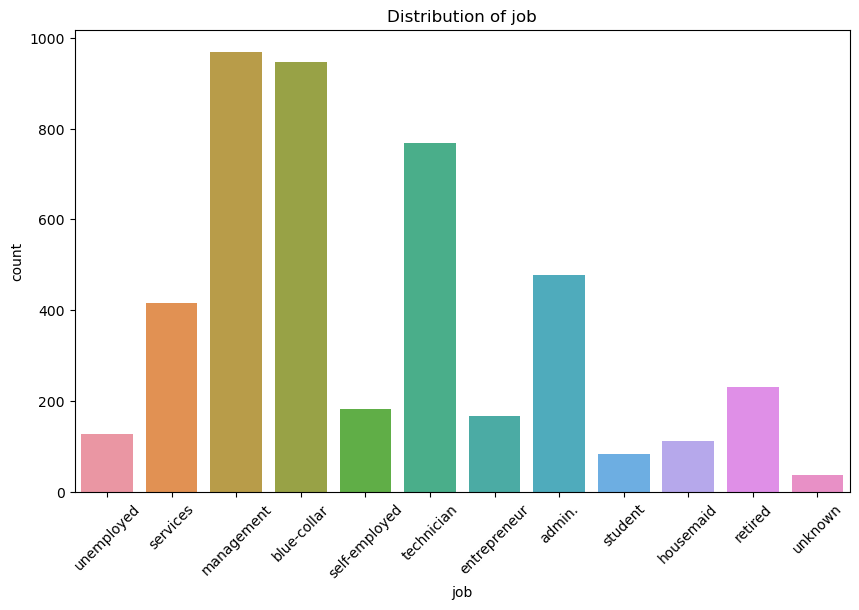

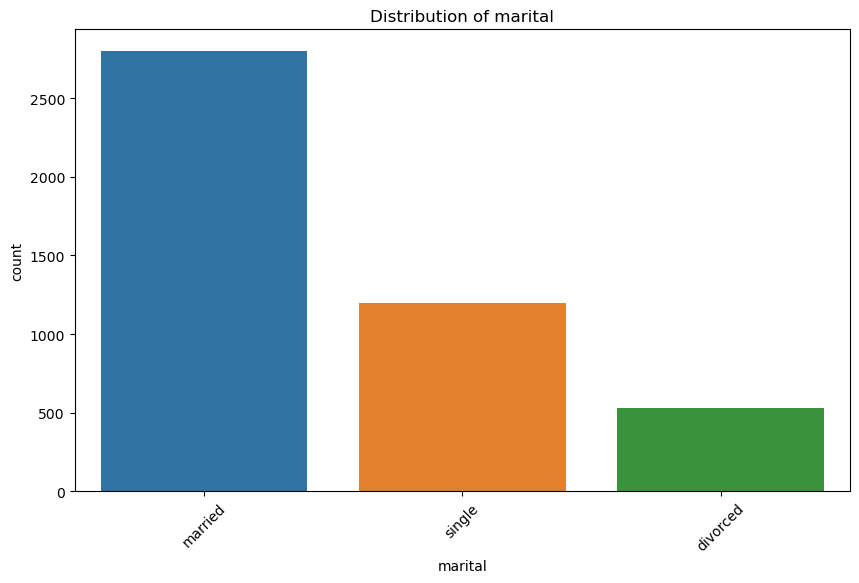

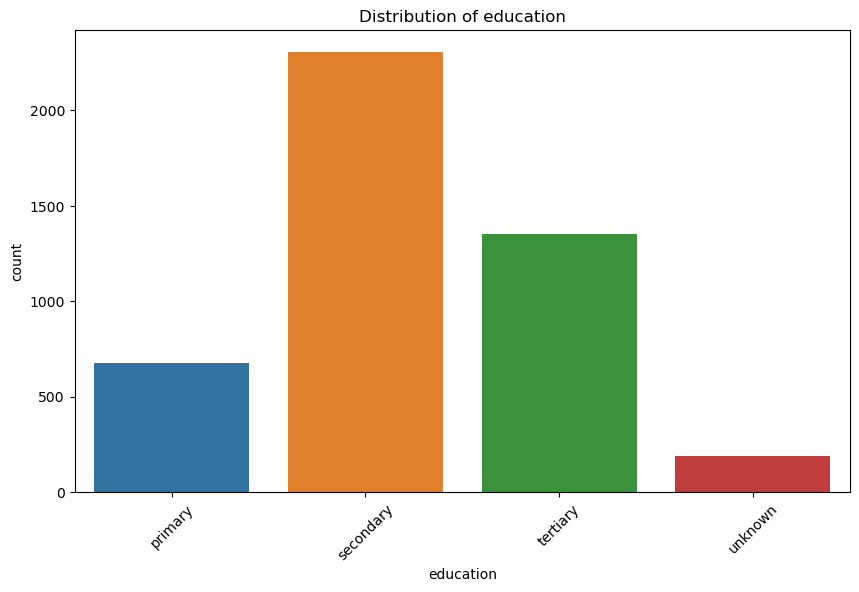

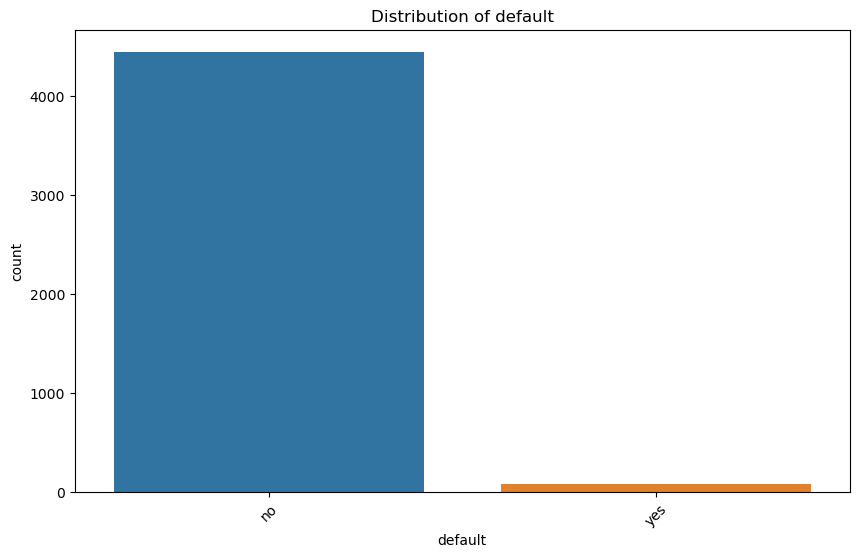

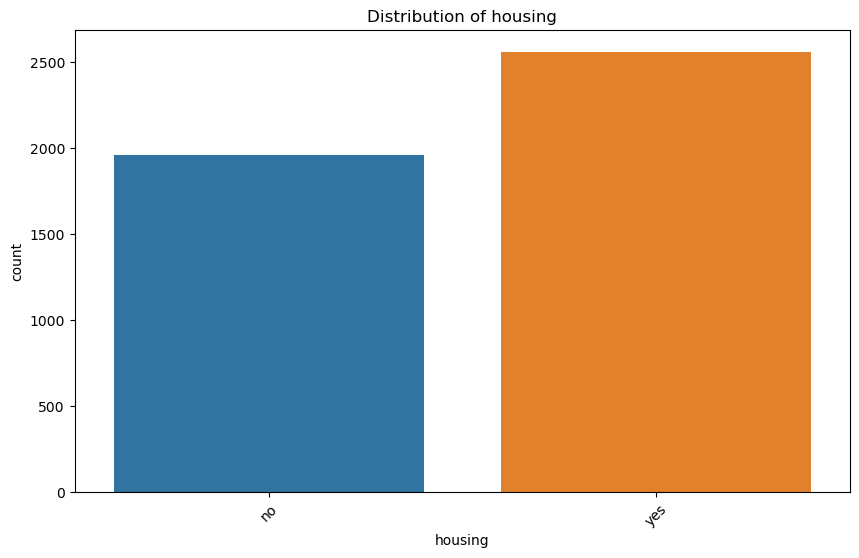

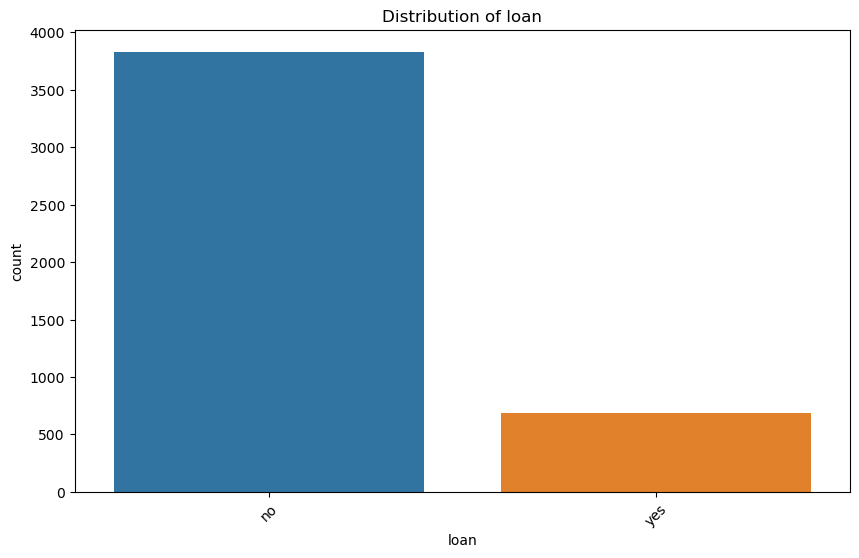

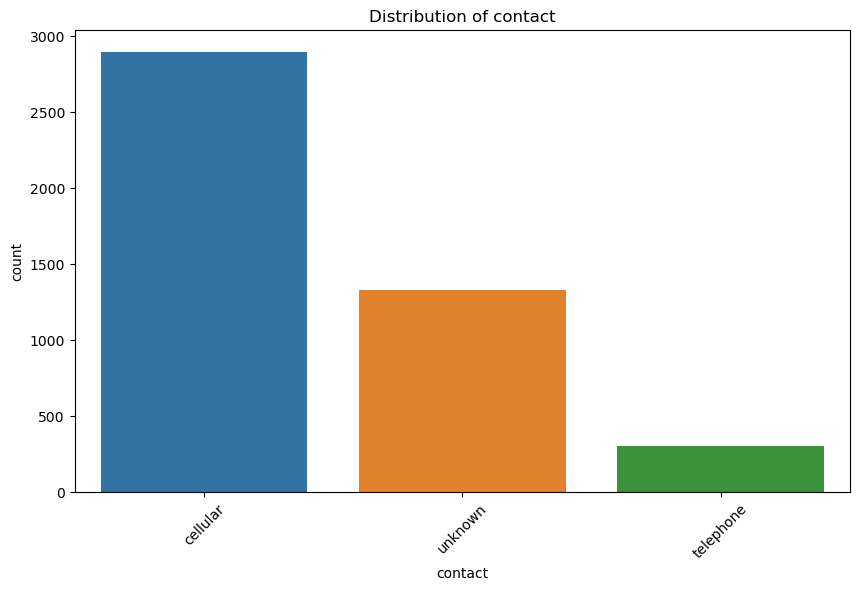

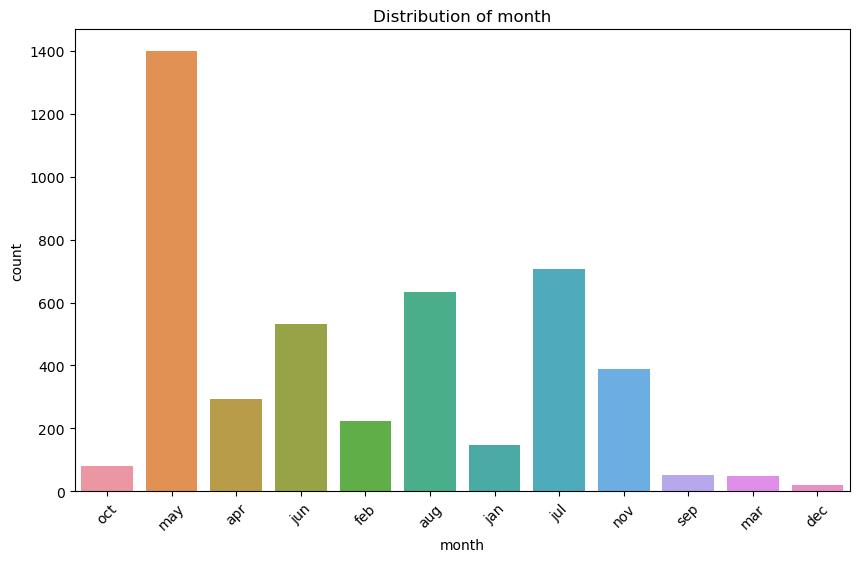

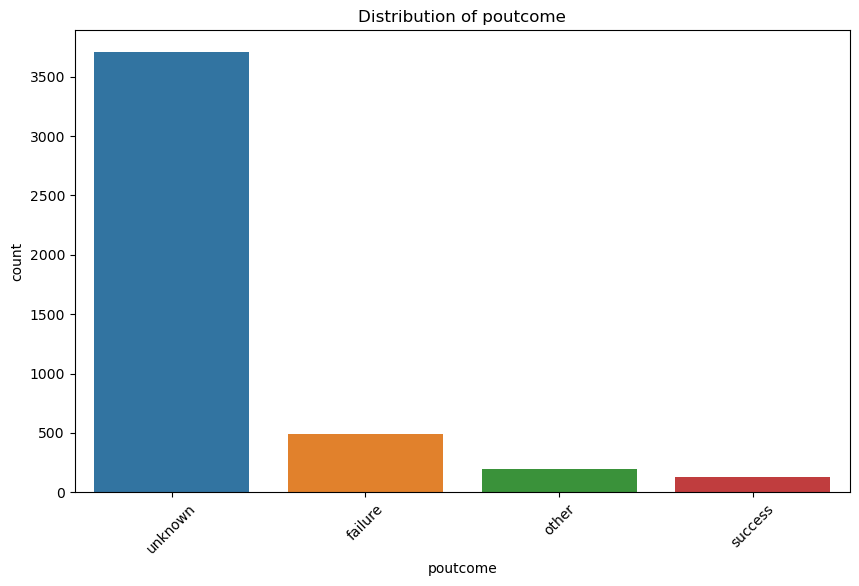

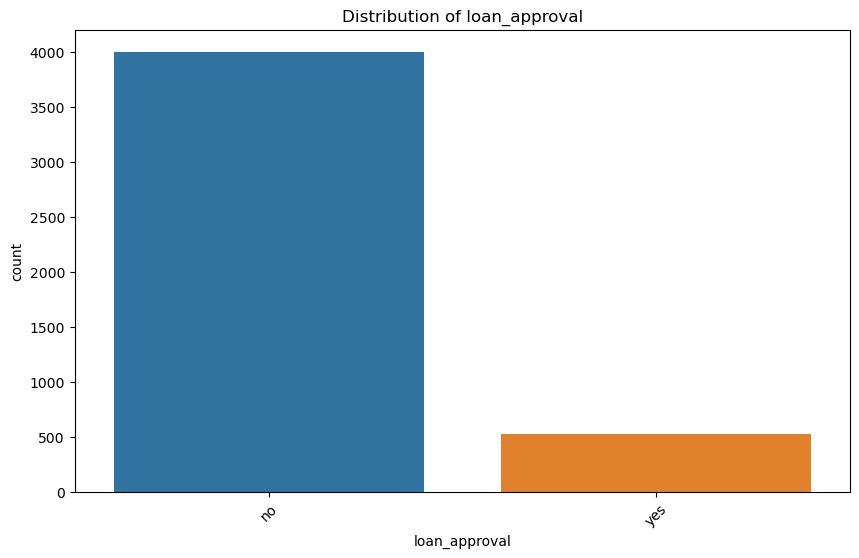

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','loan_approval']

# Plotting each categorical variable
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)  
    plt.show()

# Distribution of numerical variables

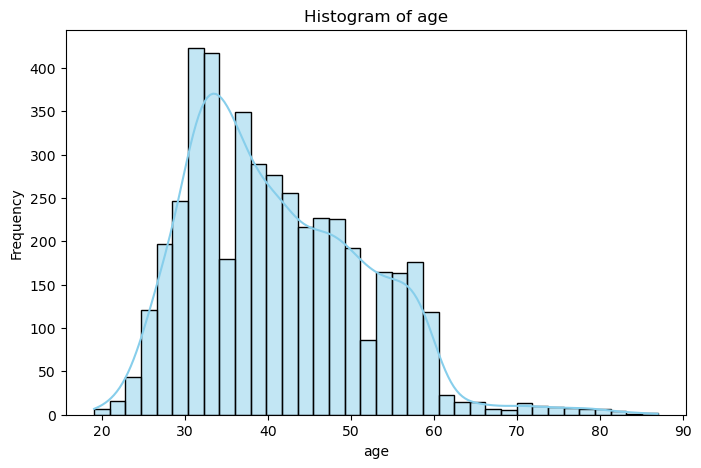

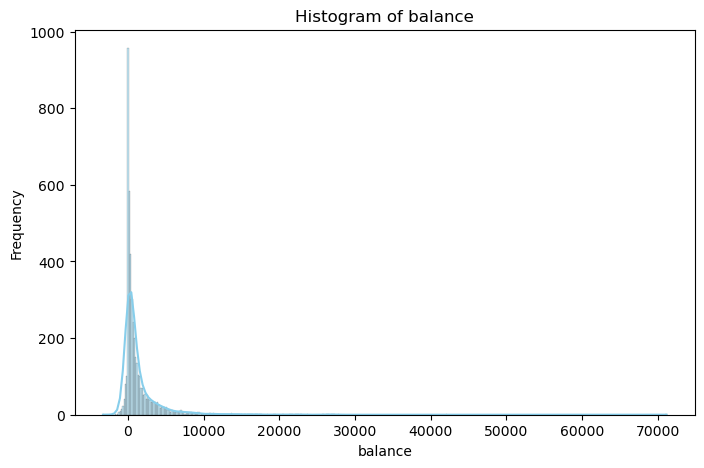

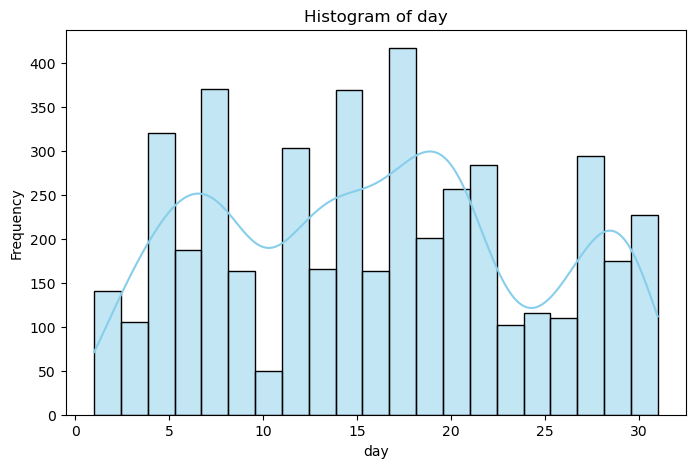

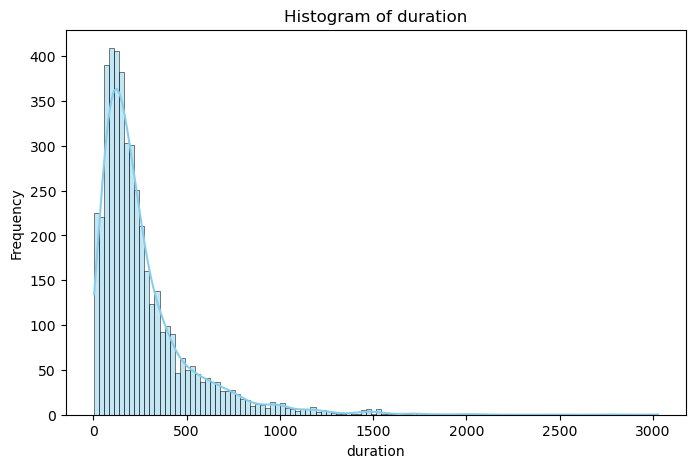

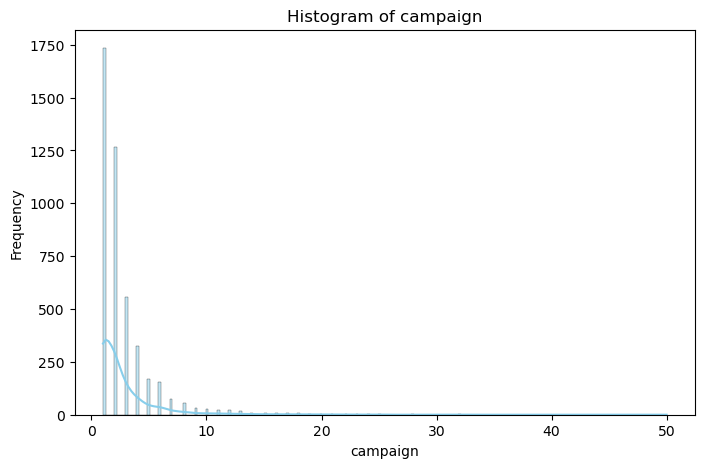

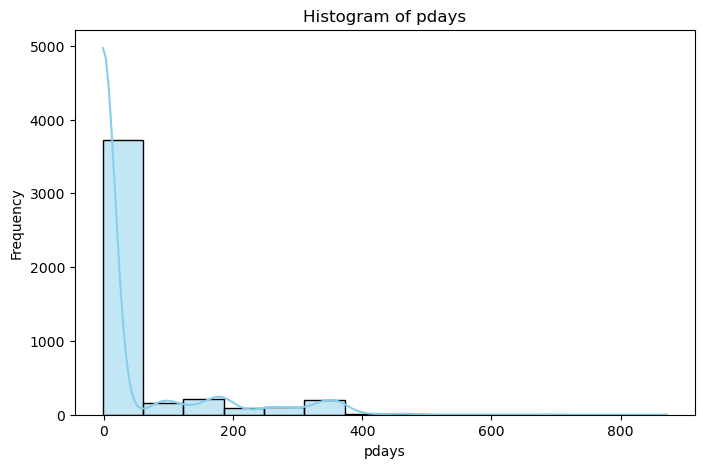

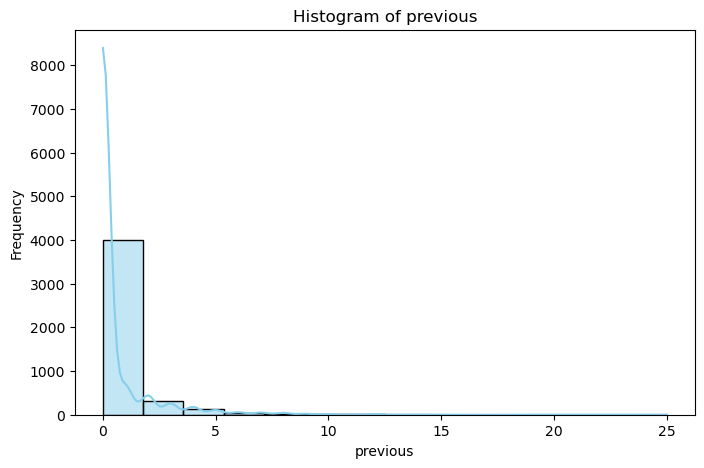

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Plotting histograms for each numerical variable
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=feature, kde=True, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


## Data Preprocessing

### One-hot encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

encode=["job","marital","education","default","housing","housing","loan","contact","month","poutcome","loan_approval"]
encode1=LabelEncoder()
for i in encode:
    data[i]=encode1.fit_transform(data[i])

In [17]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,loan_approval
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [18]:
features=data.iloc[:,:-1]
features

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1


In [19]:
label=data.iloc[:,-1]
label # loan_approval

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: loan_approval, Length: 4521, dtype: int32

### Split the data into training and testing

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.1,random_state=4)

## Building the Model

###  K-Nearest Neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = knn.predict(X_test) 
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       404
           1       0.36      0.18      0.24        49

    accuracy                           0.88       453
   macro avg       0.63      0.57      0.59       453
weighted avg       0.85      0.88      0.86       453



## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

In [34]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred2 = dt_classifier.predict(X_test) 
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [36]:
from sklearn.metrics import classification_report
report2 = classification_report(y_test, y_pred2)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       404
           1       0.36      0.18      0.24        49

    accuracy                           0.88       453
   macro avg       0.63      0.57      0.59       453
weighted avg       0.85      0.88      0.86       453



## Random Forest 

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [38]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred3 = rf_classifier.predict(X_test) 
y_pred3

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred3)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       404
           1       0.62      0.41      0.49        49

    accuracy                           0.91       453
   macro avg       0.78      0.69      0.72       453
weighted avg       0.90      0.91      0.90       453



## Performance Evaluation

In [43]:
from sklearn.metrics import accuracy_score,precision_score

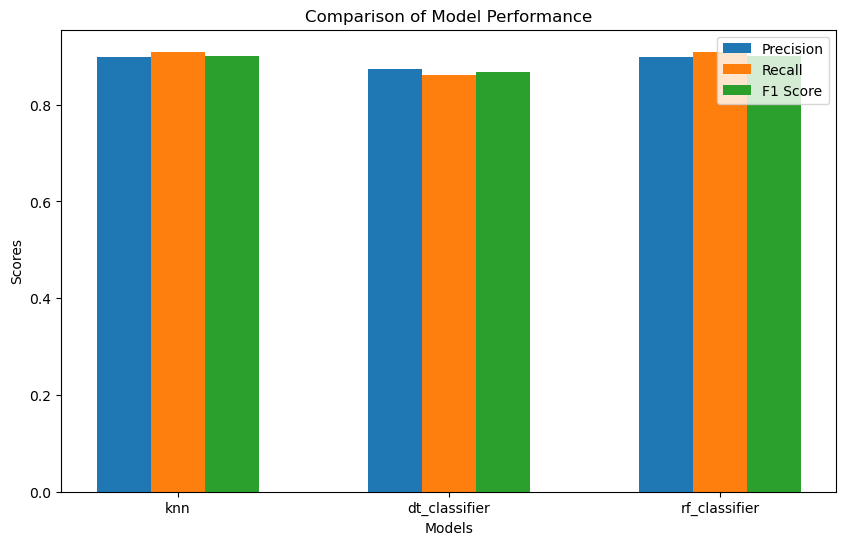

In [44]:
# Define the models and their respective predictions
models = ['knn', 'dt_classifier', 'rf_classifier']
predictions = [y_pred, y_pred2, y_pred3]

# Calculate precision, recall, and f1-score for each model
precision = []
recall = []
f1_score = []

for y_pred in predictions:
    p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precision.append(p)
    recall.append(r)
    f1_score.append(f)

# Plotting the comparison
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(models))

rect1 = ax.bar(index, precision, bar_width, label='Precision')
rect2 = ax.bar(index + bar_width, recall, bar_width, label='Recall')
rect3 = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend()

plt.show()

After examining financial data with machine learning algorithms like K-Nearest Neighbors, Random Forest, Decision Tree, we discovered that Random Forest performed the best. This suggests it could be a valuable tool for predicting creditworthiness in real-world scenarios, showing how machine learning can aid financial decision-making.